## E3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
df = pd.read_csv('chicago_data.csv', index_col = 0)

In [3]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       '_merge'],
      dtype='object')

In [4]:
df.drop(columns = {'_merge'}, inplace = True)

In [5]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,date,avgTemp
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018-01-01,-18.9
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018-01-01,-18.9
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,2018-01-01,-18.9
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,2018-01-01,-18.9
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,2018-01-01,-18.9


In [6]:
df.shape

(3603082, 14)

In [7]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
date                  object
avgTemp              float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

trip_id                       int64
start_time                   object
end_time                     object
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
date                 datetime64[ns]
avgTemp                     float64
dtype: object

### Basic plotting with pandas

In [10]:
df_temp = df.set_index('date')

In [11]:
df_temp.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,avgTemp
date,,,,,,,,,,,,,
2018-01-01,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,-18.9
2018-01-01,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,-18.9
2018-01-01,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,-18.9
2018-01-01,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,-18.9
2018-01-01,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,-18.9


<Axes: xlabel='date'>

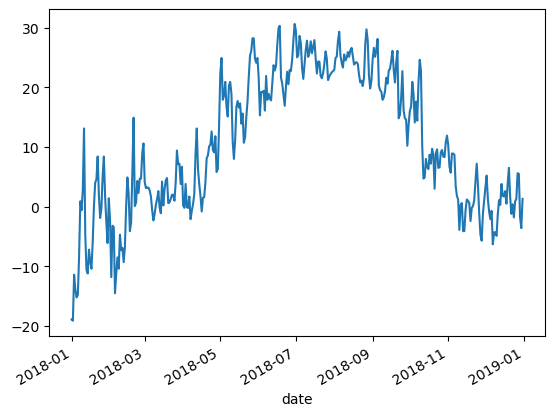

In [12]:
df_temp['avgTemp'].plot()

### Procedural approach

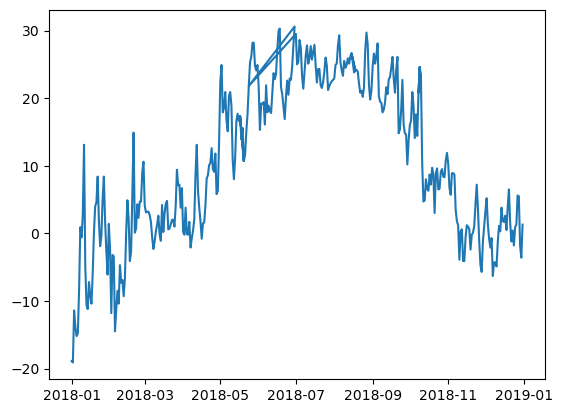

In [13]:
plt.plot(df_temp['avgTemp'])
plt.show()

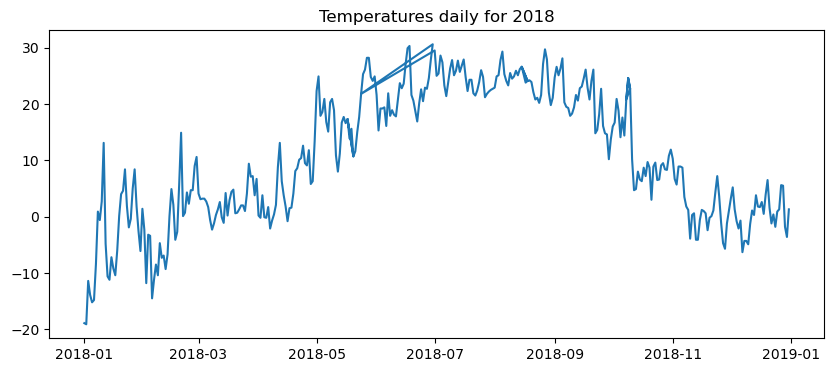

In [14]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2018')
plt.plot(df_temp['avgTemp'])
plt.show()

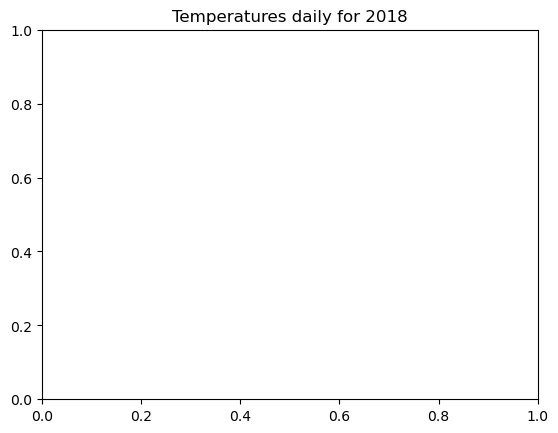

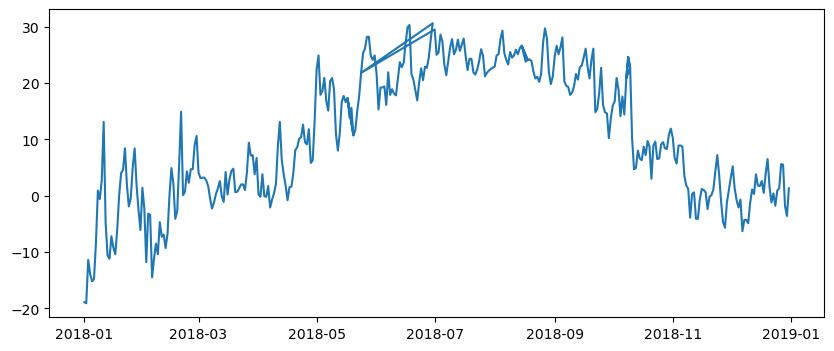

In [15]:
plt.title('Temperatures daily for 2018')
plt.figure(figsize=(10,4))
plt.plot(df_temp['avgTemp'])
plt.show()

### Aggregate trips

In [16]:
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date',
       'avgTemp'],
      dtype='object')

In [17]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['trip_id'].count()).reset_index()

In [18]:
df_group.head()

,date,trip_id
0,2018-01-01,376
1,2018-01-02,1637
2,2018-01-03,2493
3,2018-01-04,2416
4,2018-01-05,2228


In [19]:
df_group.rename(columns = {'trip_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

both          3603082
left_only           0
right_only          0
Name: _merge, dtype: int64
Shape of January 1st is (376, 16)
Shape of January 2nd is (1637, 16)
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp',
       'bike_rides_daily', '_merge'],
      dtype='object')


In [20]:
df_temp.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,
2018-01-01,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,-18.9,376,both
2018-01-01,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,-18.9,376,both
2018-01-01,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,-18.9,376,both
2018-01-01,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,-18.9,376,both
2018-01-01,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,-18.9,376,both


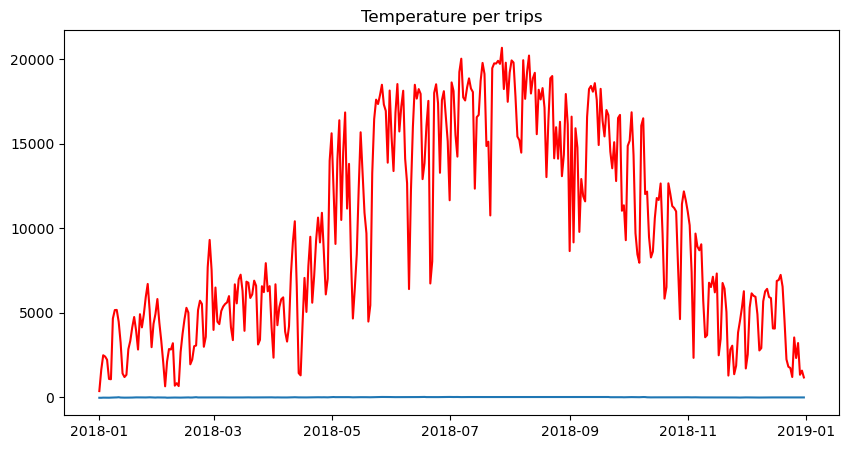

In [21]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'red')
plt.show()

### OO approach

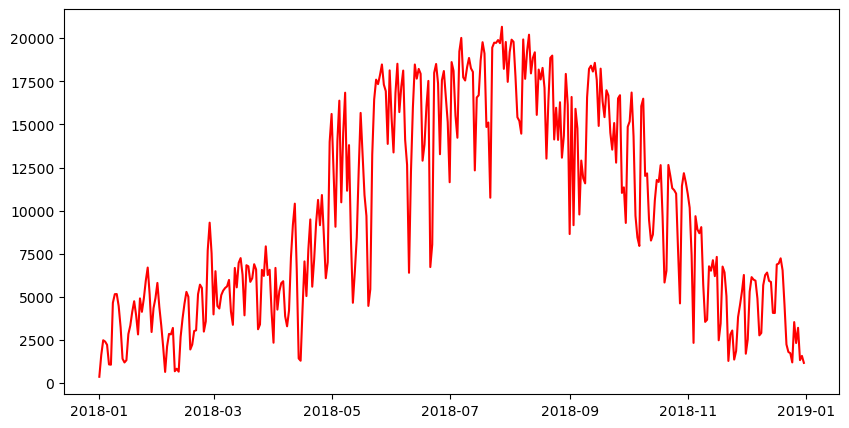

In [22]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

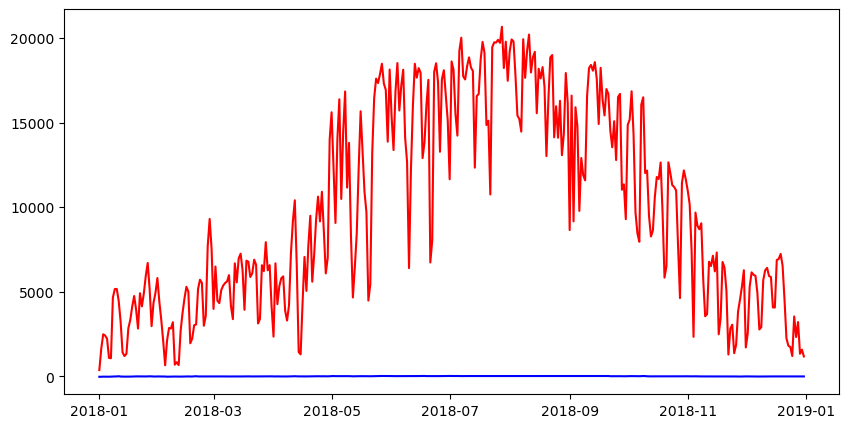

In [23]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")
ax.plot(df_temp['avgTemp'], color = 'blue')

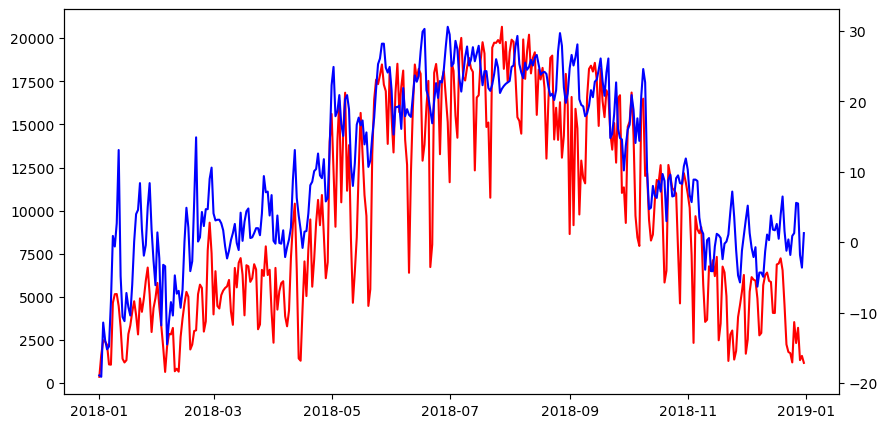

In [24]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "blue")
plt.show()

#### Final dual plot

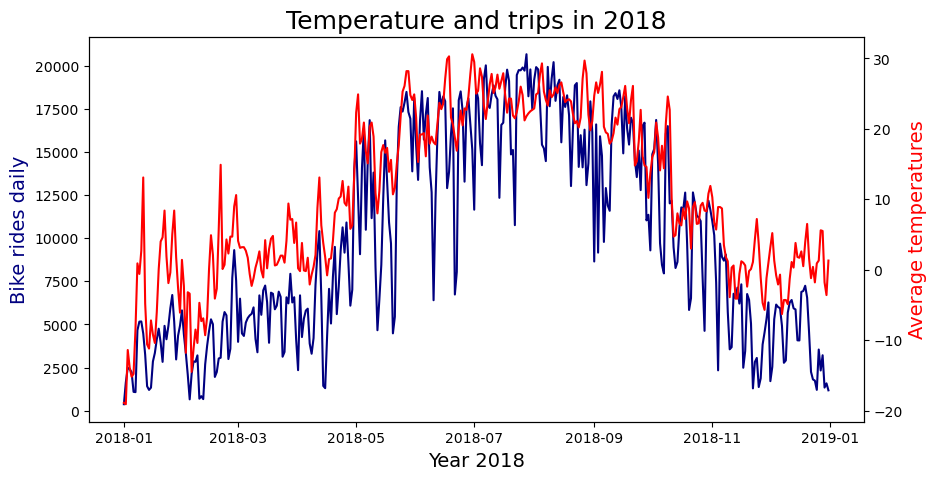

In [25]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2018", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2018', fontsize = 18)
plt.show()

In [26]:
plt.style.use('ggplot')

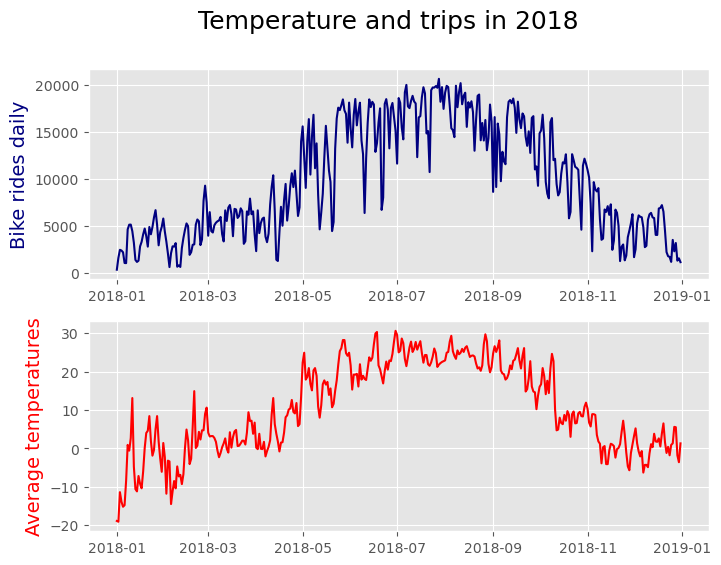

In [27]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2018', fontsize = 18)

plt.show()

In [28]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')